In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('final_dataset.csv')

In [8]:
df_y = df[["Date", "Price"]]
df_x = df.drop(columns=["Date", "Price", "Open", "High", "Low"])
scaled_data = preprocessing.scale(df_x)

C:\Users\daisu\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [12]:
len(df_x.columns)

46

In [13]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

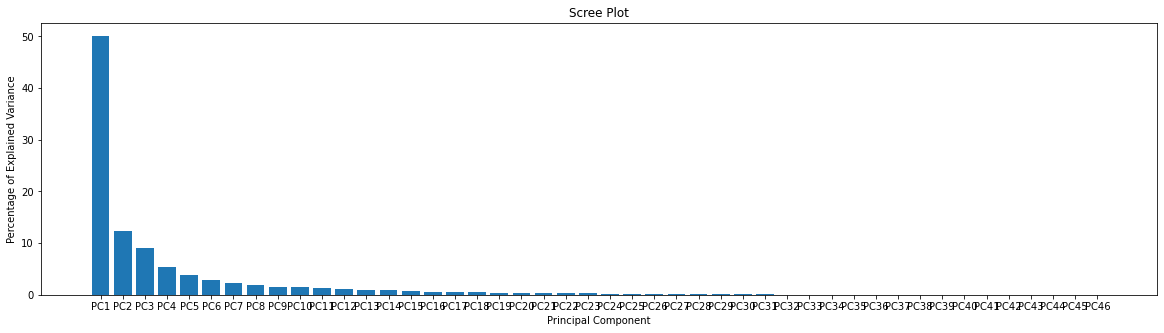

In [14]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [f"PC{i + 1}" for i in range(len(per_var))]
plt.figure(figsize=(20, 5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

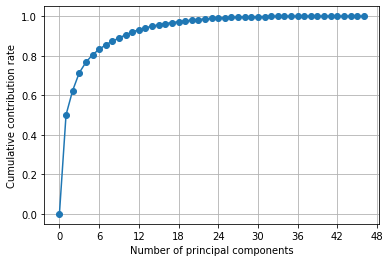

In [17]:

plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.savefig('pca_result.png', bbox_inches='tight')
plt.show()

In [33]:
df = pd.DataFrame(pca_data)

In [34]:
for column in df.columns:
    if column < 10:
        df = df.rename(columns={column:f"PC{column+1}"})
    else:
        df = df.drop(columns=[column])

In [35]:
df = pd.concat([df_y, df], axis=1)
df.to_csv('pca_data.csv', index=False)

In [36]:
df

,Date,Price,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2019-01-01,3873.8,-5.276724,-3.996305,4.415994,0.782341,0.006974,-1.158301,-0.067363,-0.493529,-0.380081,-0.816549
1,2019-01-02,3780.1,-5.170930,-1.749534,3.272299,0.231817,0.084481,-0.432730,0.612391,-0.211036,0.306339,-1.013738
2,2019-01-03,3802.7,-5.209785,-1.169560,2.974107,-0.108983,-0.049247,0.039013,0.528102,-0.261826,0.308010,-1.297063
3,2019-01-04,3785.4,-5.461036,-1.735294,2.323524,-0.567059,0.263961,0.028043,0.654446,-0.352479,0.583729,-1.297370
4,2019-01-05,4004.1,-5.670215,-3.597870,2.514400,-0.610786,0.316173,-0.390688,-0.088829,-0.400014,0.398350,-1.270139
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2021-10-17,62056.3,8.247989,-6.235256,-0.467159,-0.015834,-1.848409,0.520881,-0.291738,0.797574,-0.658913,-0.664539
1021,2021-10-18,64278.5,7.769368,-2.800591,-1.965221,-1.538361,-1.019428,1.423679,1.055461,1.265406,-0.163010,0.122867
1022,2021-10-19,65979.1,9.114730,-1.343815,-1.896115,-1.721794,-3.317679,3.028115,3.559169,3.329187,0.833770,1.369422
1023,2021-10-20,62210.2,8.975927,-2.094760,-1.719892,-1.823947,-3.041510,1.546296,1.514364,0.405193,0.770918,0.181783
